### Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
sns.set_palette("Accent")
import re

In [2]:
data = pd.read_csv("../data/raw/new.csv")
data = data[["text", "in_reply_to_status_id", "id", "favorite_count", "retweeted", "entities_hashtags", "entities_urls", "retweet_count", "in_reply_to_user_id", "user_id", "user_verified", "user_followers_count", "user_statuses_count", "user_friends_count", "user_favourites_count", "user_created_at", "lang", "created_at", "event", "category", "thread_id", "subfolder", "thread_veracity"]]
data

C:\Users\ma907\AppData\Local\Temp\ipykernel_33640\1363936054.py:1: DtypeWarning: Columns (18,35,43,51,69,90,91,92,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/raw/new.csv")


,text,in_reply_to_status_id,id,favorite_count,retweeted,entities_hashtags,entities_urls,retweet_count,in_reply_to_user_id,user_id,...,user_friends_count,user_favourites_count,user_created_at,lang,created_at,event,category,thread_id,subfolder,thread_veracity
0,"Breaking: At least 10 dead, 5 injured after tO...",NaN,552783238415265792,14,False,0,0,159,NaN,384779793,...,246,5,Tue Oct 04 09:36:17 +0000 2011,en,Wed Jan 07 11:06:08 +0000 2015,charliehebdo-all-rnr-threads,rumours,552783238415265792,source-tweets,true
1,@H_E_Samuel @George_Berridge @michael_taggart ...,5.527832e+17,552787794503143424,0,False,0,0,1,3.847798e+08,202572421,...,202,136,Thu Oct 14 10:31:21 +0000 2010,en,Wed Jan 07 11:24:15 +0000 2015,charliehebdo-all-rnr-threads,rumours,552783238415265792,reactions,true
2,@H_E_Samuel Hi Henry would you be willing to g...,5.527832e+17,552789647966109696,0,False,0,0,0,3.847798e+08,239943362,...,1317,87,Tue Jan 18 20:07:54 +0000 2011,en,Wed Jan 07 11:31:37 +0000 2015,charliehebdo-all-rnr-threads,rumours,552783238415265792,reactions,true
3,@H_E_Samuel @H_E_Samuel please call them terro...,5.527832e+17,552791411053973505,1,False,0,0,0,3.847798e+08,2903715212,...,103,498,Tue Nov 18 14:33:31 +0000 2014,en,Wed Jan 07 11:38:37 +0000 2015,charliehebdo-all-rnr-threads,rumours,552783238415265792,reactions,true
4,@H_E_Samuel French govt needs to take strict a...,5.527832e+17,552793152390955009,0,False,0,0,0,3.847798e+08,2911191121,...,369,217,Wed Nov 26 18:08:43 +0000 2014,en,Wed Jan 07 11:45:32 +0000 2015,charliehebdo-all-rnr-threads,rumours,552783238415265792,reactions,true
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105349,"@heyradar @MarkMcCleskey @JohnMartin929 crap, ...",5.445266e+17,544526845966704641,0,False,0,0,0,2.660314e+07,39262408,...,455,653,Mon May 11 14:37:07 +0000 2009,en,Mon Dec 15 16:18:11 +0000 2014,sydneysiege-all-rnr-threads,non-rumours,544521948924248066,reactions,NaN
105350,@piiizzzzaaaa @heyradar hahahaha,5.445267e+17,544526940636323840,0,False,0,0,0,2.848824e+09,39262408,...,455,653,Mon May 11 14:37:07 +0000 2009,tl,Mon Dec 15 16:18:34 +0000 2014,sydneysiege-all-rnr-threads,non-rumours,544521948924248066,reactions,NaN
105351,@Jon_Roser @heyradar @JohnMartin929 It's @chra...,5.445268e+17,544527197810475011,0,False,0,0,0,3.926241e+07,39546181,...,789,2621,Tue May 12 17:19:04 +0000 2009,en,Mon Dec 15 16:19:35 +0000 2014,sydneysiege-all-rnr-threads,non-rumours,544521948924248066,reactions,NaN
105352,@JohnMartin929 @MarkMcCleskey @PzFeed had to b...,5.445239e+17,544531943334100992,0,False,0,0,0,2.778194e+07,766894986,...,181,432,Sun Aug 19 04:19:53 +0000 2012,en,Mon Dec 15 16:38:26 +0000 2014,sydneysiege-all-rnr-threads,non-rumours,544521948924248066,reactions,NaN


### Exploratory Dataset Analysis

##### Distribución inicial de las columnas relevantes de dataset

In [3]:
#Análisis bobo básico
data.describe(include='all')

,text,in_reply_to_status_id,id,favorite_count,retweeted,entities_hashtags,entities_urls,retweet_count,in_reply_to_user_id,user_id,...,user_friends_count,user_favourites_count,user_created_at,lang,created_at,event,category,thread_id,subfolder,thread_veracity
count,105354,9.791200e+04,1.053540e+05,105354.000000,105354,105354.000000,105354.000000,105354.000000,9.793000e+04,1.053540e+05,...,105354.000000,1.053540e+05,105354,105354,105354,105354,105354,1.053540e+05,105354,33125
unique,103938,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50586,47,90530,9,2,NaN,2,3
top,@BBCBreaking,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Thu Mar 06 19:51:29 +0000 2008,en,Fri Jan 09 15:50:08 +0000 2015,charliehebdo-all-rnr-threads,non-rumours,NaN,reactions,true
freq,29,NaN,NaN,NaN,105354,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,179,97135,16,38268,72229,NaN,98929,15275
mean,NaN,5.367989e+17,5.367314e+17,14.570088,NaN,0.299429,0.111159,26.253707,4.975779e+08,7.908828e+08,...,1407.400630,4.168918e+03,NaN,NaN,NaN,NaN,NaN,5.366596e+17,NaN,NaN
std,NaN,2.297594e+16,2.315018e+16,551.709663,NaN,0.720219,0.326563,513.945730,7.911757e+08,9.434540e+08,...,8031.339956,1.256579e+04,NaN,NaN,NaN,NaN,NaN,2.316814e+16,NaN,NaN
min,NaN,4.982355e+17,4.982355e+17,0.000000,NaN,0.000000,0.000000,0.000000,5.800000e+01,5.800000e+01,...,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,4.982355e+17,NaN,NaN
25%,NaN,5.249439e+17,5.249450e+17,0.000000,NaN,0.000000,0.000000,0.000000,1.922216e+07,6.596324e+07,...,183.000000,8.900000e+01,NaN,NaN,NaN,NaN,NaN,5.249376e+17,NaN,NaN
50%,NaN,5.444357e+17,5.444436e+17,0.000000,NaN,0.000000,0.000000,0.000000,1.129061e+08,3.249850e+08,...,477.000000,6.330000e+02,NaN,NaN,NaN,NaN,NaN,5.444113e+17,NaN,NaN
75%,NaN,5.531045e+17,5.531220e+17,1.000000,NaN,0.000000,0.000000,0.000000,4.962362e+08,1.325359e+09,...,1170.750000,3.045000e+03,NaN,NaN,NaN,NaN,NaN,5.529849e+17,NaN,NaN


In [4]:
total_nan = data.isnull().sum().sum()
rows_with_nan = data[data.isnull().sum(axis=1) > 0].shape[0]
print('total nulls :', total_nan)
print('examples with at least a null feature:', rows_with_nan)

print('percentage of examples with nulls : {:.2%}'.format(rows_with_nan/data.shape[0]))
data.isnull().sum()

total nulls : 87095
examples with at least a null feature: 74904
percentage of examples with nulls : 71.10%


text                         0
in_reply_to_status_id     7442
id                           0
favorite_count               0
retweeted                    0
entities_hashtags            0
entities_urls                0
retweet_count                0
in_reply_to_user_id       7424
user_id                      0
user_verified                0
user_followers_count         0
user_statuses_count          0
user_friends_count           0
user_favourites_count        0
user_created_at              0
lang                         0
created_at                   0
event                        0
category                     0
thread_id                    0
subfolder                    0
thread_veracity          72229
dtype: int64

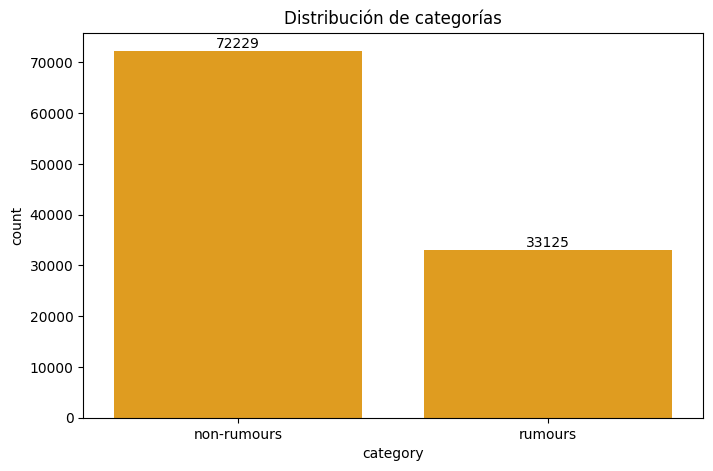

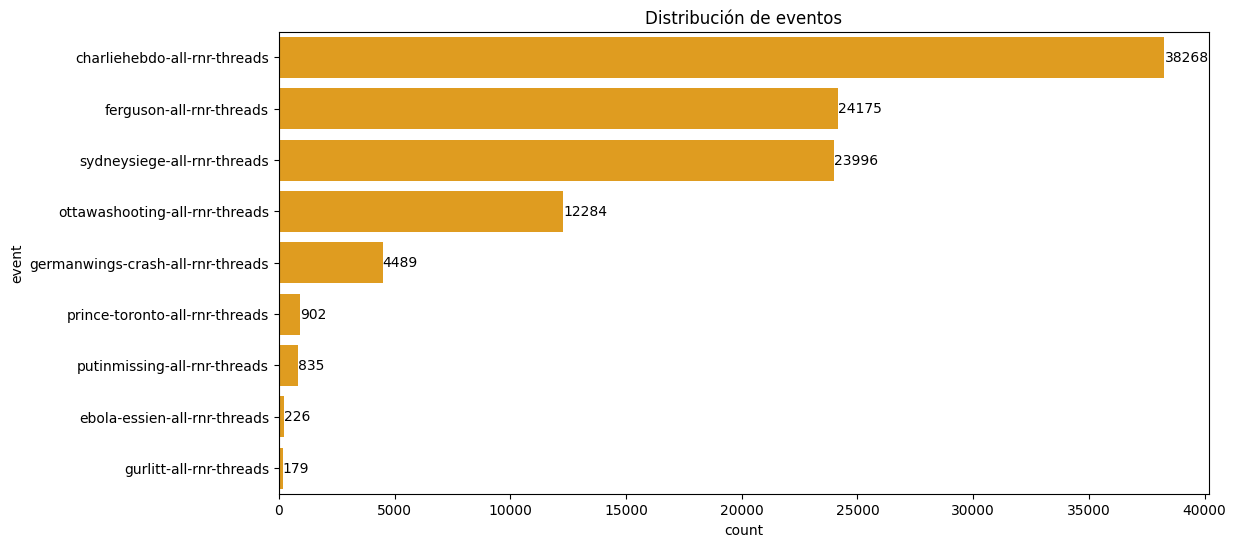

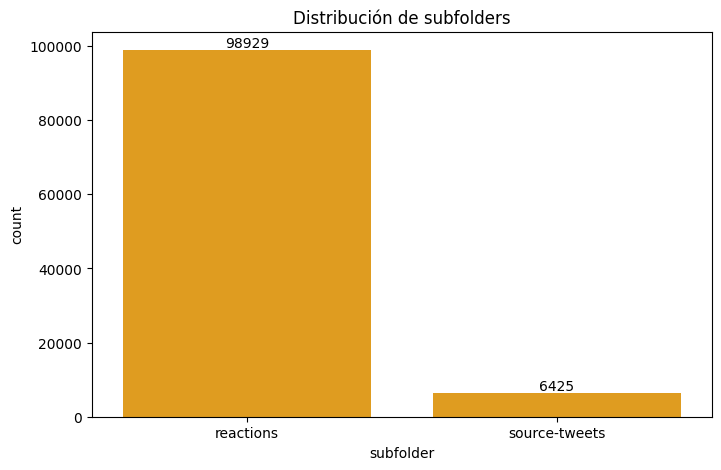

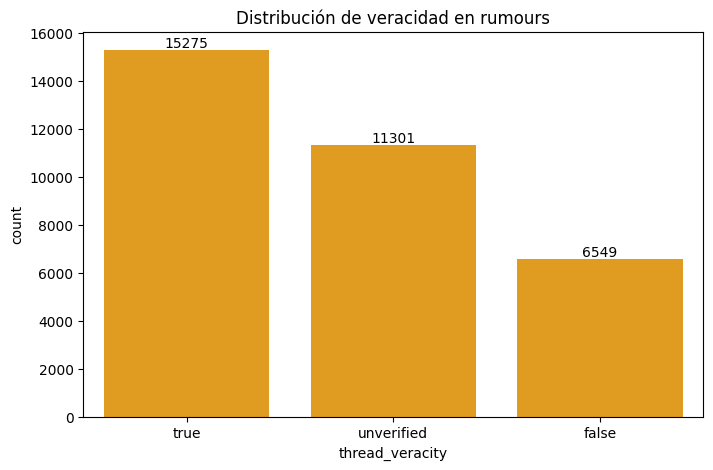

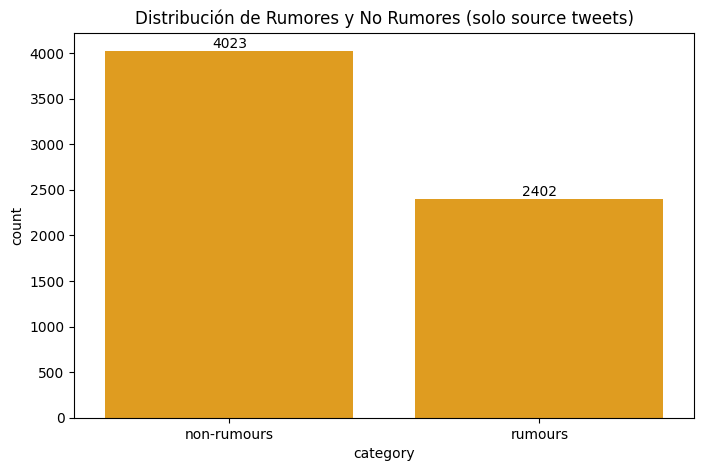

In [8]:
#Categories
plt.figure(figsize=(8,5))
ax =sns.countplot(x="category", data=data, order=data['category'].value_counts().index, color= 'orange')
ax.bar_label(ax.containers[0])
plt.title("Distribución de categorías")
plt.show()

# Events
plt.figure(figsize=(12,6))
ax = sns.countplot(y="event", data=data, order=data['event'].value_counts().index, color='orange')
ax.bar_label(ax.containers[0])
plt.title("Distribución de eventos")
plt.show()

# Subfolders
plt.figure(figsize=(8,5))
ax = sns.countplot(x="subfolder", data=data, order=data['subfolder'].value_counts().index, color= 'orange')
ax.bar_label(ax.containers[0])
plt.title("Distribución de subfolders")
plt.show()

#Veracity in rumours
plt.figure(figsize=(8,5))
ax = sns.countplot(x="thread_veracity", data=data[data['category']=="rumours"],
              order=data[data['category']=="rumours"]['thread_veracity'].value_counts().index, color= 'orange')
ax.bar_label(ax.containers[0])
plt.title("Distribución de veracidad en rumours")
plt.show()

# Rumours vs no rumours in source tweets
plt.figure(figsize=(8,5))
ax = sns.countplot(x="category", data=data[data["subfolder"]=="source-tweets"], order=data[data["subfolder"]=="source-tweets"]["category"].value_counts().index,
    color="orange")
ax.bar_label(ax.containers[0])
plt.title("Distribución de Rumores y No Rumores (solo source tweets)")
plt.show()




#### Analizando los textos de los tweets


C:\Users\ma907\AppData\Local\Temp\ipykernel_33640\4232597169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source_tweets['text_length'] = source_tweets['text'].apply(lambda x: len(str(x).split()))


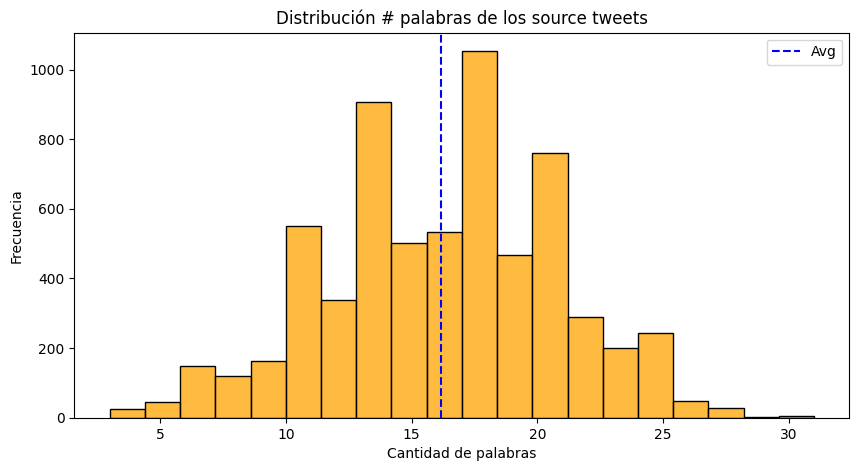

In [17]:
source_tweets = data[data['subfolder'] == 'source-tweets']
source_tweets['text_length'] = source_tweets['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10,5))
sns.histplot(source_tweets['text_length'], bins=20, color='orange')
plt.axvline(source_tweets['text_length'].mean(), color='blue', linestyle='--', label='Avg')
plt.title("Distribución # palabras de los source tweets")
plt.xlabel("Cantidad de palabras")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

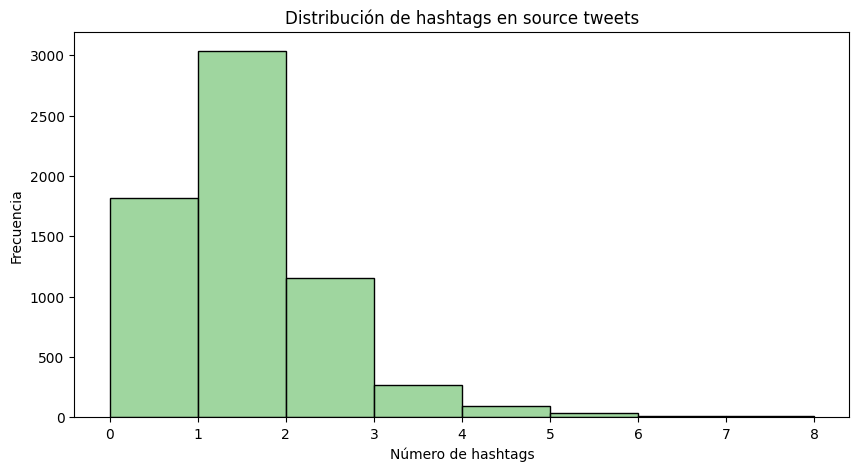

In [24]:
# numero de hashtags
plt.figure(figsize=(10,5))
sns.histplot(data[data['subfolder']=="source-tweets"]['entities_hashtags'], bins = 8)
plt.title("Distribución de hashtags en source tweets")
plt.xlabel("Número de hashtags")
plt.ylabel("Frecuencia")
plt.show()


C:\Users\ma907\AppData\Local\Temp\ipykernel_33640\3182165486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


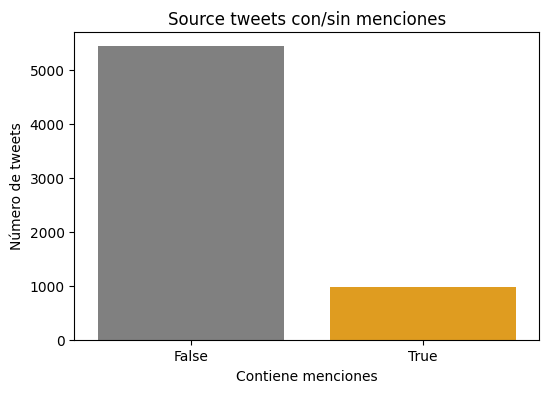

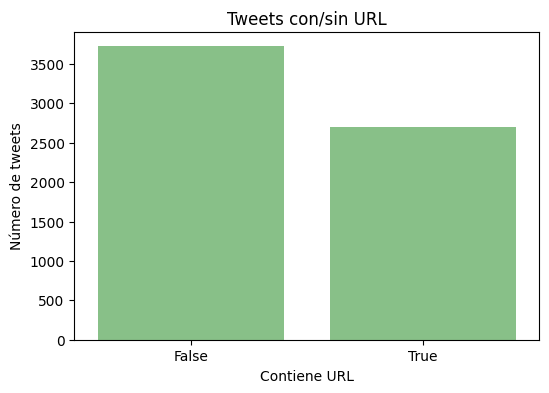

C:\Users\ma907\AppData\Local\Temp\ipykernel_33640\3182165486.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=source_tweets['text'].apply(lambda x: len(emoji_pattern.findall(x))>0), palette=["gray","orange"])


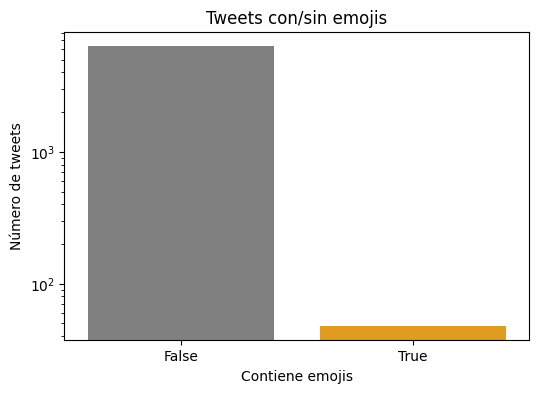

In [18]:
#Mentions
plt.figure(figsize=(6,4))
sns.countplot(
    x=data[data['subfolder']=="source-tweets"]['text'].str.contains(r"@\w+"),
    palette=["gray","orange"]
)
plt.title("Source tweets con/sin menciones")
plt.xlabel("Contiene menciones")
plt.ylabel("Número de tweets")
plt.show()

#url?
plt.figure(figsize=(6,4))
sns.countplot(x=source_tweets["entities_urls"] != 0)
plt.title("Tweets con/sin URL")
plt.xlabel("Contiene URL")
plt.ylabel("Número de tweets")
plt.show()

#emojis?
emoji_pattern = re.compile("[\U00010000-\U0010ffff]", flags=re.UNICODE)
plt.figure(figsize=(6,4))
sns.countplot(x=source_tweets['text'].apply(lambda x: len(emoji_pattern.findall(x))>0), palette=["gray","orange"])
plt.title("Tweets con/sin emojis")
plt.yscale("log")
plt.xlabel("Contiene emojis")
plt.ylabel("Número de tweets")
plt.show()


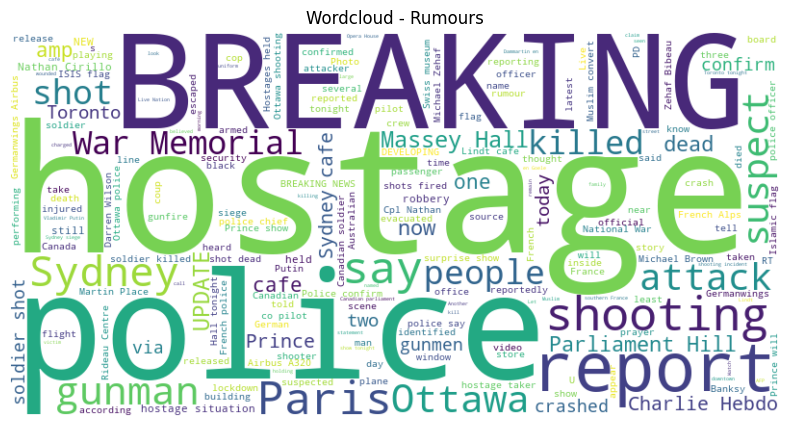

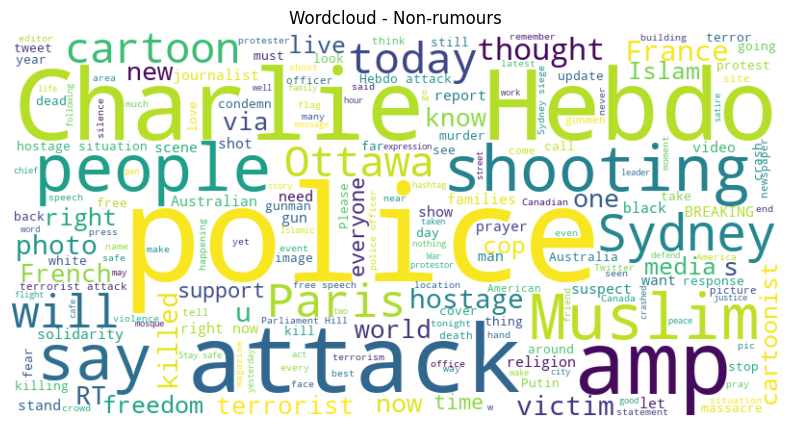

In [27]:
def plot_wordcloud(texts, title): 
    cleaned = texts.apply(lambda x: re.sub(r"http\S+|@\w+|#\w+", "", x)) 
    wc = WordCloud(width=800, height=400, background_color="white").generate(" ".join(cleaned))
    plt.figure(figsize=(10,5)) 
    plt.imshow(wc, interpolation="bilinear") 
    plt.axis("off") 
    plt.title(title) 
    plt.show() 
    
plot_wordcloud(source_tweets[source_tweets['category']=="rumours"]['text'], "Wordcloud - Rumours") 
plot_wordcloud(source_tweets[source_tweets['category']=="non-rumours"]['text'], "Wordcloud - Non-rumours")

C:\Users\ma907\AppData\Local\Temp\ipykernel_33640\2251733275.py:9: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x=source['text'].str.contains(r"@\w+"), hue=source['category'], palette=["gray","orange","coral"])


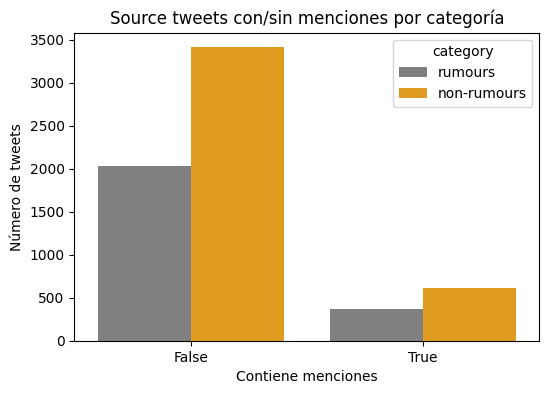

C:\Users\ma907\AppData\Local\Temp\ipykernel_33640\2251733275.py:17: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(


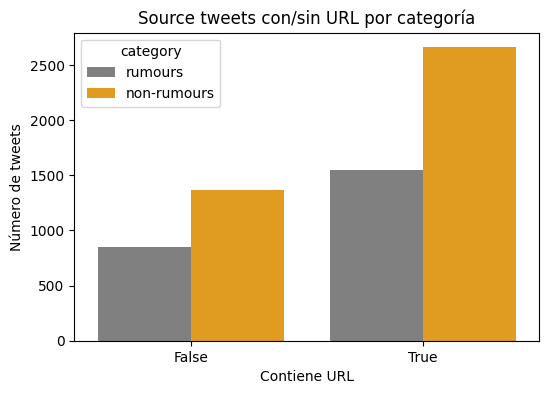

C:\Users\ma907\AppData\Local\Temp\ipykernel_33640\2251733275.py:30: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(


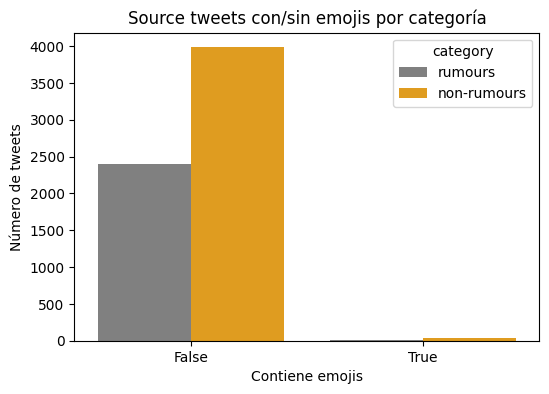

C:\Users\ma907\AppData\Local\Temp\ipykernel_33640\2251733275.py:42: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(


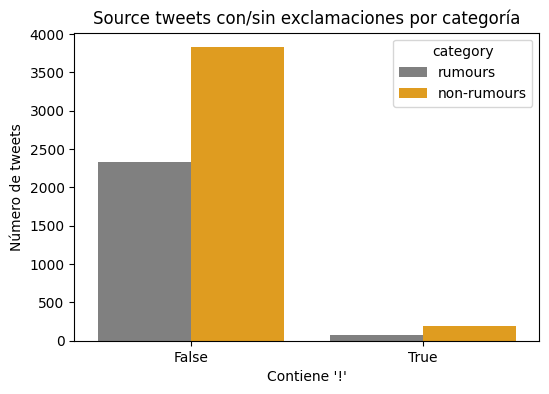

C:\Users\ma907\AppData\Local\Temp\ipykernel_33640\2251733275.py:54: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(


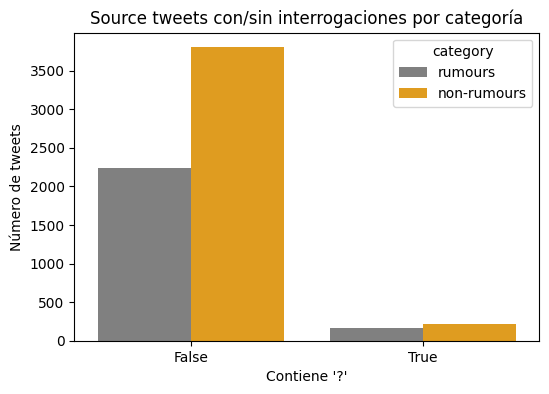

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import re

source = data[data["subfolder"]=="source-tweets"]

#Mentions per category
plt.figure(figsize=(6,4))
sns.countplot(x=source['text'].str.contains(r"@\w+"), hue=source['category'], palette=["gray","orange","coral"])
plt.title("Source tweets con/sin menciones por categoría")
plt.xlabel("Contiene menciones")
plt.ylabel("Número de tweets")
plt.show()

#URLs
plt.figure(figsize=(6,4))
sns.countplot(x=source['text'].str.contains(r"http[s]?://\S+"), hue=source['category'], palette=["gray","orange","coral"])
plt.title("Source tweets con/sin URL por categoría")
plt.xlabel("Contiene URL")
plt.ylabel("Número de tweets")
plt.show()

#Emojis
emoji_pattern = re.compile("[\U00010000-\U0010ffff]", flags=re.UNICODE)
plt.figure(figsize=(6,4))
sns.countplot(
    x=source['text'].apply(lambda x: len(emoji_pattern.findall(x))>0),
    hue=source['category'],
    palette=["gray","orange","coral"]
)
plt.title("Source tweets con/sin emojis por categoría")
plt.xlabel("Contiene emojis")
plt.ylabel("Número de tweets")
plt.show()

#Signos de exclamación
plt.figure(figsize=(6,4))
sns.countplot(x=source['text'].str.contains(r"!"), hue=source['category'], palette=["gray","orange","coral"])
plt.title("Source tweets con/sin exclamaciones por categoría")
plt.xlabel("Contiene '!'")
plt.ylabel("Número de tweets")
plt.show()

# Signos de interrogación
plt.figure(figsize=(6,4))
sns.countplot(x=source['text'].str.contains(r"\?"), hue=source['category'], palette=["gray","orange","coral"])
plt.title("Source tweets con/sin interrogaciones por categoría")
plt.xlabel("Contiene '?'")
plt.ylabel("Número de tweets")
plt.show()


In [23]:
#analisis de sentimientos
from textblob import TextBlob

def classify_sentiment(text):
    p = TextBlob(str(text)).sentiment.polarity
    return "POSITIVE" if p > 0.1 else "NEGATIVE" if p < -0.1 else "NEUTRAL"

data["sentiment"] = data["text"].astype(str).apply(classify_sentiment)
print(data["sentiment"].value_counts())


sentiment
NEUTRAL     58786
POSITIVE    26828
NEGATIVE    19740
Name: count, dtype: int64


#### Análisis de sentimientos detallado

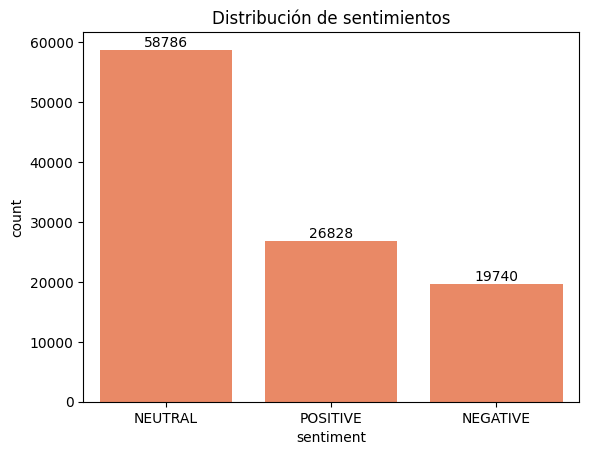

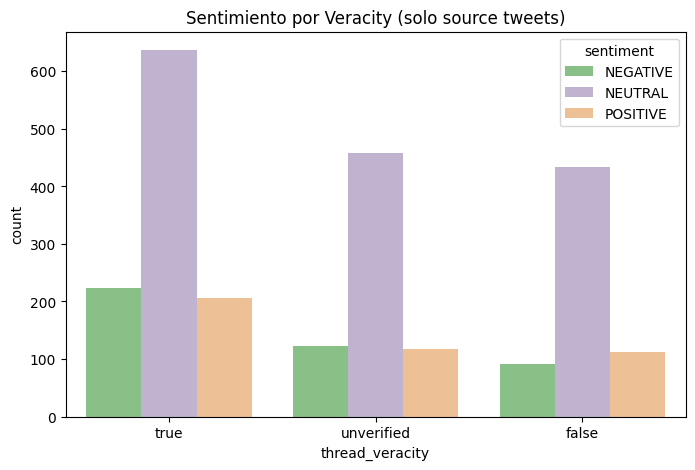

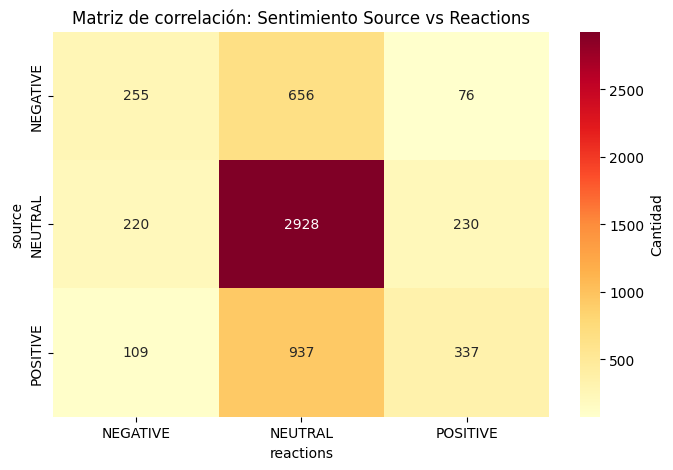

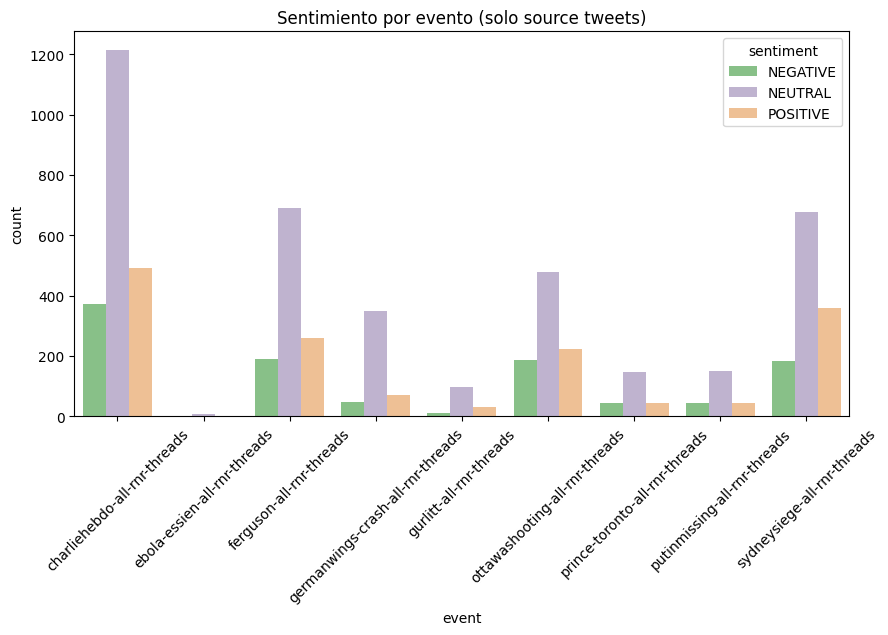

In [24]:
ax = sns.countplot(x="sentiment", data=data, order=data['sentiment'].value_counts().index, color='coral')
ax.bar_label(ax.containers[0])
plt.title("Distribución de sentimientos")
plt.show()


plt.figure(figsize=(8,5))
ax = sns.countplot( x="thread_veracity", data=data[data["subfolder"]=="source-tweets"], hue="sentiment")
plt.title("Sentimiento por Veracity (solo source tweets)")
plt.show()

# Sentimiento del source por thread
source_sent = (
    data[data["subfolder"]=="source-tweets"]
    .groupby("thread_id")["sentiment"]
    .first()
)
# Sentimiento dominante de reactions por thread
react_sent = (
    data[data["subfolder"]=="reactions"]
    .groupby("thread_id")["sentiment"]
    .apply(lambda x: x.mode()[0] if len(x.mode())>0 else "neutral")
)

# Combinar
sent_compare = pd.DataFrame({
    "source": source_sent,
    "reactions": react_sent
}).dropna()

# Heatmap de correlación categórica
plt.figure(figsize=(8,5))
ax = sns.heatmap(
    pd.crosstab(sent_compare["source"], sent_compare["reactions"]),
    annot=True, fmt='d', cmap='YlOrRd',
    cbar_kws={'label': 'Cantidad'}
)
plt.title("Matriz de correlación: Sentimiento Source vs Reactions")
plt.show()


plt.figure(figsize=(10,5))
ax = sns.countplot(
    x="event",
    data=data[data["subfolder"]=="source-tweets"],
    hue="sentiment"
)
plt.title("Sentimiento por evento (solo source tweets)")
plt.xticks(rotation=45)
plt.show()


#### Vamos a analizar ahora un poco lo que tiene que ver con la estructura de la red y sus interacciones

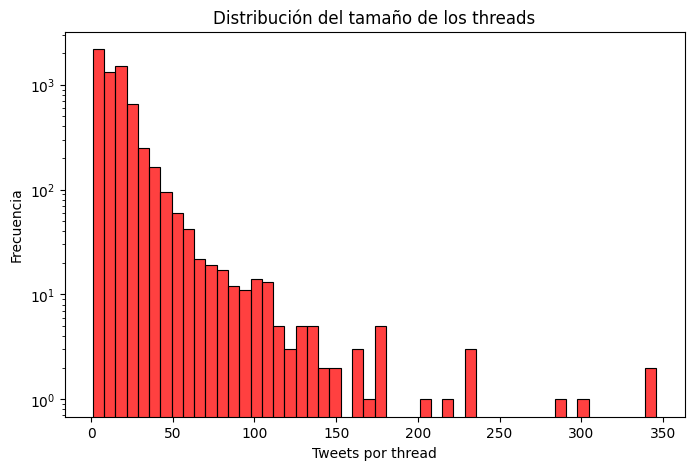

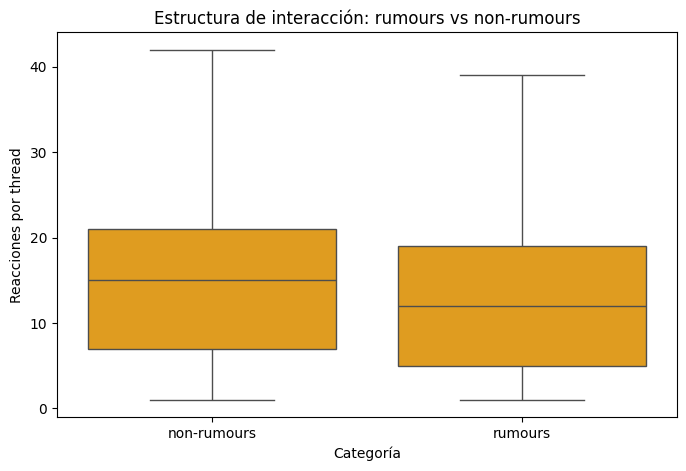

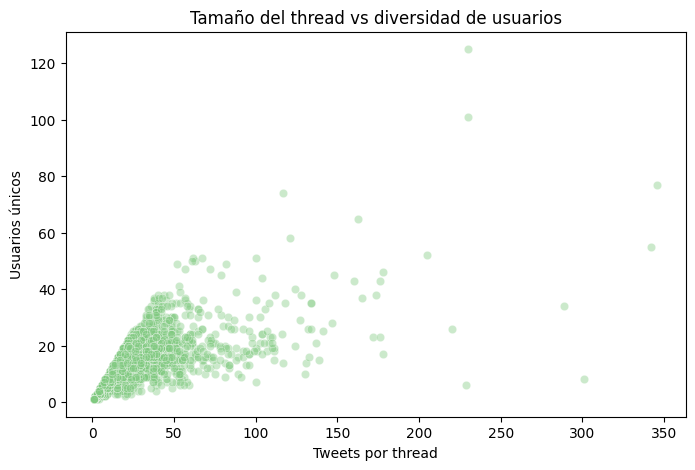

In [22]:
#Threahds size
plt.figure(figsize=(8,5))
sns.histplot( data=(data.groupby('thread_id').size().reset_index(name='n_tweets')), x='n_tweets', bins=50, color = 'red')
plt.title("Distribución del tamaño de los threads")
plt.yscale("log")
plt.xlabel("Tweets por thread")
plt.ylabel("Frecuencia")
plt.show()


#Rumours vs non-rumours
plt.figure(figsize=(8,5))
sns.boxplot(
    data=(data[data['subfolder'] == 'reactions'].groupby('thread_id').size().reset_index(name='n_reactions').merge(data.groupby('thread_id')['category'].first().reset_index(), on='thread_id')),
    x='category', y='n_reactions', showfliers=False, color = 'orange')
plt.xlabel("Categoría")
plt.ylabel("Reacciones por thread")
plt.title("Estructura de interacción: rumours vs non-rumours")
plt.show()

#Size vs diversidad de usuarios
plt.figure(figsize=(8,5))
sns.scatterplot(data=(data.groupby('thread_id').agg(n_tweets=('id','count'), n_users=('user_id','nunique')).reset_index()), x='n_tweets', y='n_users', alpha=0.4)
plt.xlabel("Tweets por thread")
plt.ylabel("Usuarios únicos")
plt.title("Tamaño del thread vs diversidad de usuarios")
plt.show()



C:\Users\ma907\AppData\Local\Temp\ipykernel_33640\1142174293.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['created_at'], errors='coerce')
C:\Users\ma907\AppData\Local\Temp\ipykernel_33640\1142174293.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data=(data.sort_values('date').groupby('thread_id').apply(lambda df: (df[df['subfolder']=='reactions']['date'].min() -


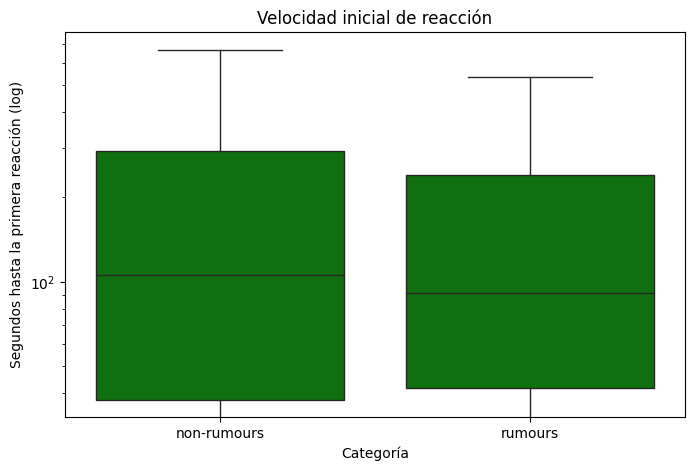

In [25]:
data['date'] = pd.to_datetime(data['created_at'], errors='coerce')


plt.figure(figsize=(8,5))
sns.boxplot(
    data=(data.sort_values('date').groupby('thread_id').apply(lambda df: (df[df['subfolder']=='reactions']['date'].min() -
            df[df['subfolder']=='source-tweets']['date'].min()).total_seconds())
        .reset_index(name='time_to_first_reaction')
        .merge(data.groupby('thread_id')['category'].first().reset_index(), on='thread_id')
    ),
    x='category', y='time_to_first_reaction', showfliers=False, color = "green")
plt.yscale('log')
plt.xlabel("Categoría")
plt.ylabel("Segundos hasta la primera reacción (log)")
plt.title("Velocidad inicial de reacción")
plt.show()